In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from PIL import Image

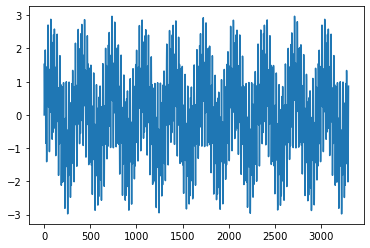

In [2]:
# 1d data

L0 = 10
L1 = 1
L2 = 0.3
sf = int(10 / L2)
t_span = L0 * 10
t = np.linspace(0, t_span, sf * t_span)

def sin(x, L):
    return np.sin(2 * np.pi * (1 / L) * x)

signal = sin(t, L0) + sin(t, L1) + sin(t, L2)

plt.plot(signal)
# plt.plot(sin(x, L0), 'r--')
# plt.plot(sin(x, L1), 'g--')
# plt.plot(sin(x, L2), 'm--')
plt.show()

In [76]:
# What wavelets available for continuous transform
wavlist = pywt.wavelist(kind='continuous')
print(wavlist)

['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']


In [73]:
# Look at what scales you need to cover periods in your data
scl_l, scl_h = 1, 100
wav = 'mexh'
f = pywt.scale2frequency(wav, [scl_l, scl_h]) / (1 / sf)
print(1 / f)

[ 0.12121212 12.12121212]


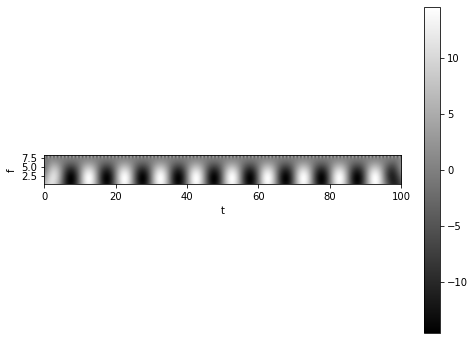

In [74]:
# Continuous wavelet transform

scl_arr = np.arange(scl_l, scl_h + 1)
coefs, freqs = pywt.cwt(signal, scl_arr, wav, sampling_period = 1 / sf)
ymin, ymax = freqs.min(), freqs.max()
xmin, xmax = 0, t_span

# Plot time-frequency spectrum
fig, ax = plt.subplots(figsize=(8,6))
im = ax.imshow(coefs, cmap='gray', extent=(xmin, xmax, ymin, ymax))
fig.colorbar(im, ax=ax)
ax.set_ylabel('f')
ax.set_xlabel('t')
plt.show()

In [88]:
wavlist = pywt.wavelist(kind='discrete')
print(wavlist)

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']


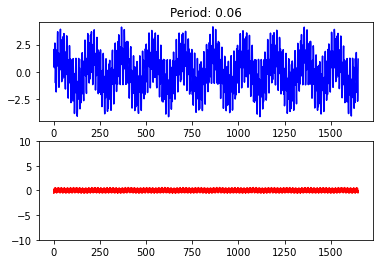

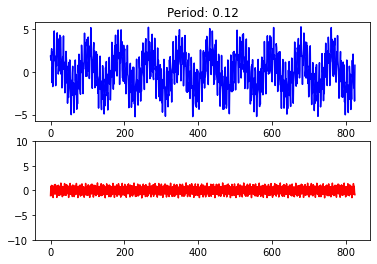

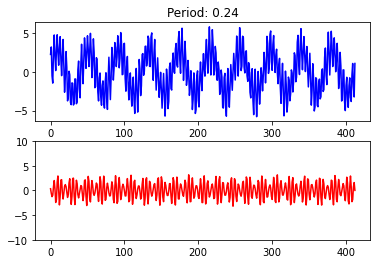

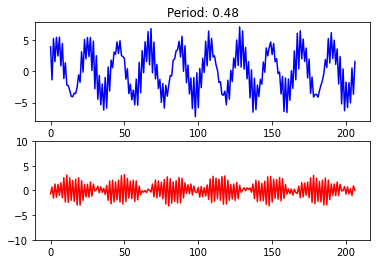

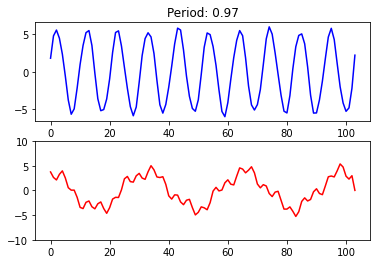

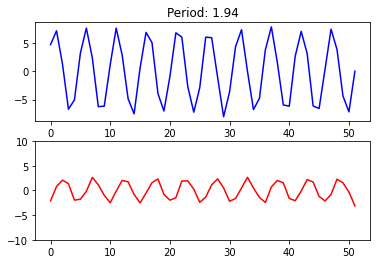

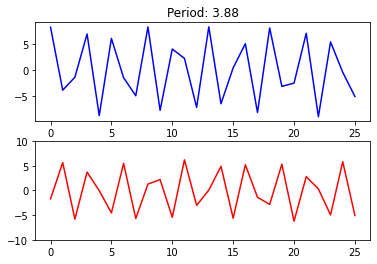

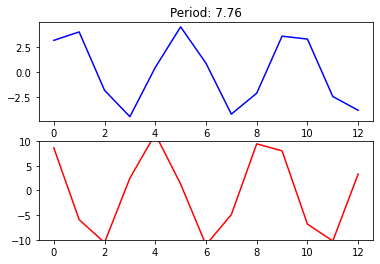

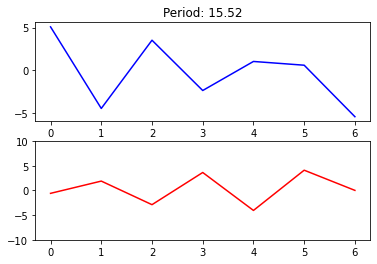

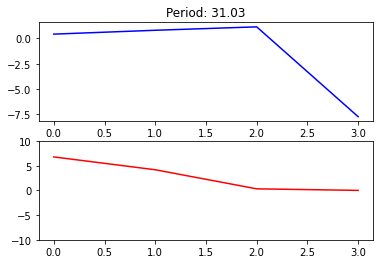

In [76]:
# Discrete wavelet transform
wav = 'db1'
n_levels = 10

for i in range(1,n_levels+1):
    coefs = pywt.wavedec(signal, wav, level=i)
    ave = coefs[0]
    deets = coefs[1:]
    
    fig, ax = plt.subplots(2,1)
    ax[0].plot(ave, 'b')
    ax[1].plot(deets[0], 'r')
    ax[0].set_title(f"Period: {(1/sf)*(2**i):.2f}")
    ax[1].set_ylim(-10, 10)
    plt.show()

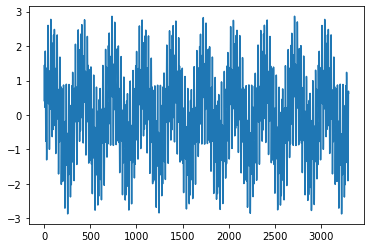

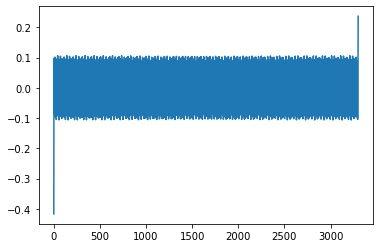

In [8]:
# Multi resolution analysis

coefs = pywt.mra(signal, 'db1', level=1)

plt.plot(coefs[0])
plt.show()
plt.plot(coefs[1])
plt.show()

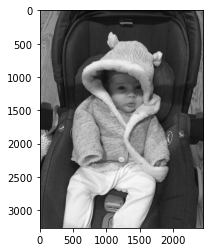

In [3]:
# 2d data

ana = Image.open('ana_xmas_21.JPG').convert('L')
ana = np.array(ana).T
ana = np.real(ana)
plt.imshow(ana, cmap='gray')
plt.show()

(3264, 2448) (1632, 1224) 1


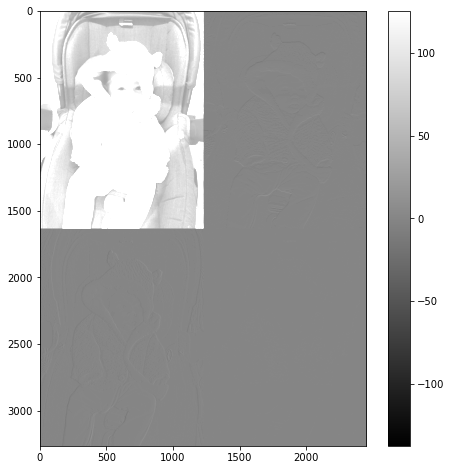

In [53]:
# Discrete wavelet transform
wav = 'db1'
level = 1

coefs = pywt.wavedec2(ana, wav, level=level)
ave = coefs[0] # Average
deets = coefs[1:] # List of tuples of arrays of coefficients
print(ana.shape, ave.shape, len(deets))

vmin, vmax = 0, 0
for tup in deets:
    for arr in tup:
        if arr.min() < vmin:
            vmin = arr.min()
        if arr.max() > vmax:
            vmax = arr.max()

upper_left = np.vstack([np.hstack([ave, deets[0][0]]), np.hstack([deets[0][1], deets[0][2]])])

for i in range(1, len(deets)):
    upper_left = np.vstack([np.hstack([upper_left, deets[i][0]]), np.hstack([deets[i][1], deets[i][2]])])

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(upper_left, cmap='gray', vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=ax)
plt.show()
